# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


## 1.Read the dataset to the python environment.

In [3]:
# importing data set in to python envirinment 
df=pd.read_excel("iris (3).xls")


In [4]:
#first five rows of dataset
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Last five rows of dataset
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2.Do necessary pre-processing steps

In [6]:
#shape of the dataset
df.shape

(150, 5)

In [7]:
#columns present in the dataset
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
#A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Check for null values
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

* null values present

In [10]:
df.isnull()

,SL,SW,PL,PW,Classification
0,False,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


<AxesSubplot:xlabel='SL', ylabel='Density'>

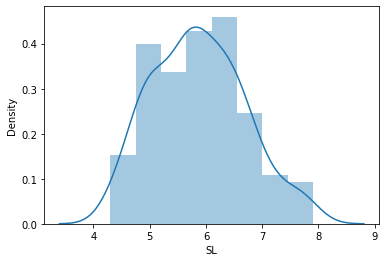

In [62]:
#distplot
x=df["SL"]
sns.distplot(x)

<AxesSubplot:xlabel='SW', ylabel='Density'>

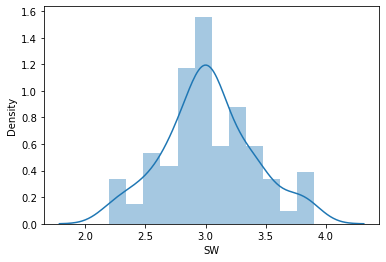

In [63]:
x=df["SW"]
sns.distplot(x)

<AxesSubplot:xlabel='PL', ylabel='Density'>

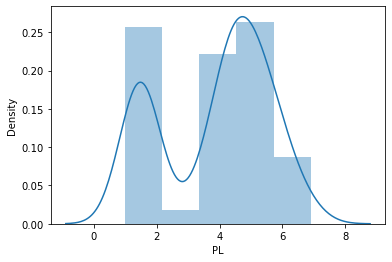

In [64]:
x=df["PL"]
sns.distplot(x)

In [11]:
#fill null value with mediam
df["SL"]=df["SL"].fillna(df["SL"].median())
df["SW"]=df["SW"].fillna(df["SW"].median())
df["PL"]=df["PL"].fillna(df["PL"].median())


In [12]:
# Check for null values
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
#to display stats about data
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.nunique()

SL                35
SW                23
PL                44
PW                22
Classification     3
dtype: int64

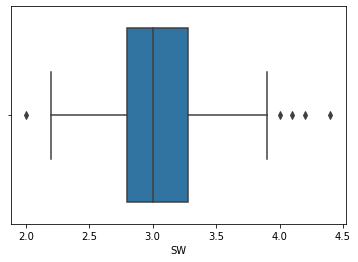

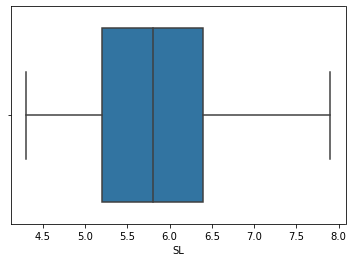

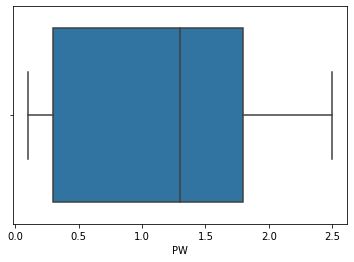

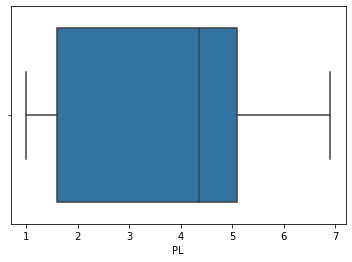

In [15]:
#finding outliers
for i in ["SW","SL","PW","PL"]:
    sns.boxplot(x=df[i])
    plt.show()

In [16]:
#finding different quartile values of SW
Q1= np.percentile(df["SW"],25,interpolation="midpoint")
Q2= np.percentile(df["SW"],50,interpolation="midpoint")
Q3= np.percentile(df["SW"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [17]:
#finding IQR
IQR= Q3-Q1
IQR
#finding lowe limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [18]:
#removing all the value below low limit& above upper limt
outlier=[]
for x in df["SW"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
        

In [19]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [20]:
#finding index of this outliers & droping
index=df["SW"][(df["SW"]<low_lim)|(df["SW"]>up_lim)].index
df.drop(index,inplace=True)


<AxesSubplot:xlabel='SW'>

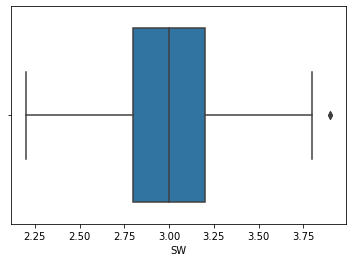

In [21]:
 sns.boxplot(x=df["SW"])

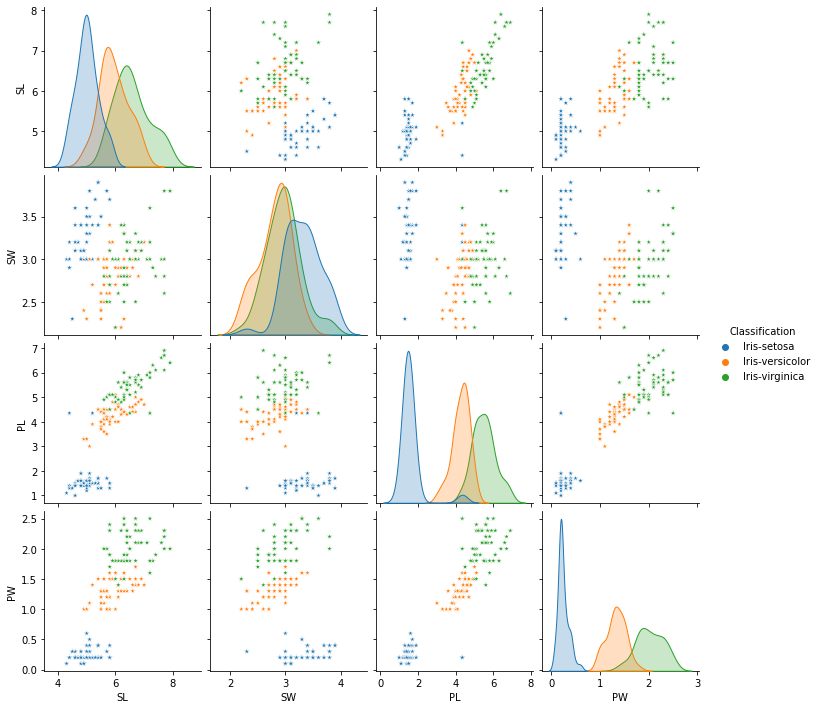

In [22]:
sns.pairplot(df,hue="Classification",markers="*")
plt.show()

In [23]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102874,0.843357,0.809185
SW,-0.102874,1.000000,-0.362630,-0.294115
PL,0.843357,-0.362630,1.000000,0.933262
PW,0.809185,-0.294115,0.933262,1.000000


<AxesSubplot:>

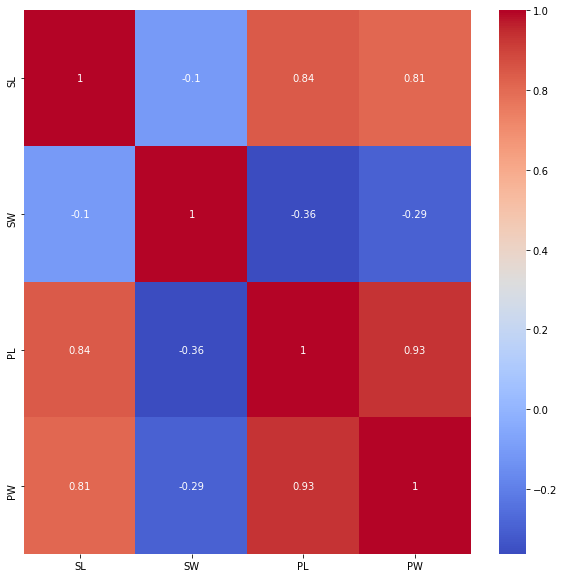

In [24]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax,cmap="coolwarm")

In [25]:
#label encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df["Classification"]=label_encoder.fit_transform(df["Classification"])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [26]:
#model training
y=df["Classification"]
X=df.drop(columns=["Classification"],axis=1)


In [27]:
print(X.shape)
print(y.shape)

(145, 4)
(145,)


In [28]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.25)

In [29]:
X_train.shape

(108, 4)

In [30]:
y_train.shape

(108,)

In [31]:
X_test.shape

(37, 4)

In [32]:
y_test.shape

(37,)

### a.logestic regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [34]:
y_test[:]

74     1
145    2
29     0
21     0
46     0
122    2
131    2
113    2
89     1
20     0
12     0
59     1
133    2
83     1
78     1
40     0
117    2
138    2
105    2
106    2
99     1
141    2
11     0
71     1
35     0
49     0
55     1
81     1
116    2
9      0
4      0
28     0
125    2
130    2
18     0
10     0
123    2
Name: Classification, dtype: int32

In [35]:
y_pred[:]

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [37]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [38]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.8918918918918919
precision is: 0.8834498834498835
recall is 0.8915343915343915
f1 is 0.8839506172839506


### b. KNN

In [39]:
#knn
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    acc_values
    
    
   

Text(0, 0.5, 'accuracy')

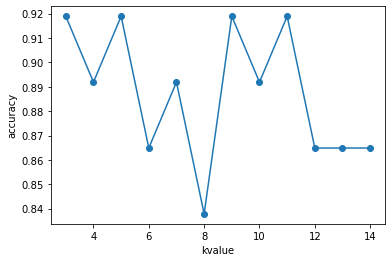

In [40]:
#which k value for highest accuracy
plt.plot(neighbors,acc_values,"o-")
plt.xlabel("kvalue")
plt.ylabel("accuracy")

In [41]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [42]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.8648648648648649
precision is: 0.861111111111111
recall is 0.8677248677248678
f1 is 0.8570071903405238


In [43]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [44]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.918918918918919
precision is: 0.9095238095238095
recall is 0.9153439153439153
f1 is 0.9112132182307621


### c. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)



In [46]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [47]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.918918918918919
precision is: 0.9076923076923077
recall is 0.9153439153439153
f1 is 0.9103313840155945


### d. Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(X_train,y_train)
y_pred=rm.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [50]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.9459459459459459
precision is: 0.9391534391534391
recall is 0.9391534391534391
f1 is 0.9391534391534391


### e. svm

In [51]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)

In [52]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.918918918918919
precision is: 0.9076923076923077
recall is 0.9153439153439153
f1 is 0.9103313840155945


In [53]:
#svm-polynomial
svm_poly=SVC(kernel="poly",degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)

In [54]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.9459459459459459
precision is: 0.9407407407407407
recall is 0.9391534391534391
f1 is 0.9391230310770541


In [56]:
#svm-radial
svm_radial=SVC(kernel="rbf")
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

In [57]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.8648648648648649
precision is: 0.861111111111111
recall is 0.8677248677248678
f1 is 0.8570071903405238


### f.Gradient Booster

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(X_train,y_train)
y_pred=rm.predict(X_test)


In [59]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [60]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 0.9459459459459459
precision is: 0.9391534391534391
recall is 0.9391534391534391
f1 is 0.9391534391534391


#### Insight:
*  RandomForest classifier,svm-polynomial & gradient booster give 94 % accuracy ,so that the best models for iris dataset are RandomForest classifier,svm-polynomial & gradient booster.

* Among 8 model logestic regression classifier and svm -radial model posses least accuracy score 0.0.891891 & 0.864864 respectively .it doesn't mean that it is not a good model.it is good one because the score is above 0.5.when comparing with all other modelit is low score.

* RandomForest classifier,Gradient Booster	having same accuracy.

* Highest F1 score is for RandomForest classifier and svm-polynomial.Logestic regression and svm-radial having low f1- score.


